# CAS BDAI CUP SUBMISSION NOTEBOOK



# Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/My Drive/Colab Notebooks/Assign3/"

In [169]:
#import data
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
comp_data = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30857 entries, 0 to 30856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         30857 non-null  object 
 1   year          30857 non-null  int64  
 2   price         30857 non-null  int64  
 3   transmission  30857 non-null  object 
 4   mileage       30857 non-null  int64  
 5   fuelType      30857 non-null  object 
 6   tax           30857 non-null  int64  
 7   mpg           30857 non-null  float64
 8   engineSize    30857 non-null  float64
 9   brand         30857 non-null  object 
 10  ID            30857 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.6+ MB


**Korrelationen der Variablen inspezieren (vor dem one-hot encoding)** 

<ipython-input-6-245fd5ba6aac>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


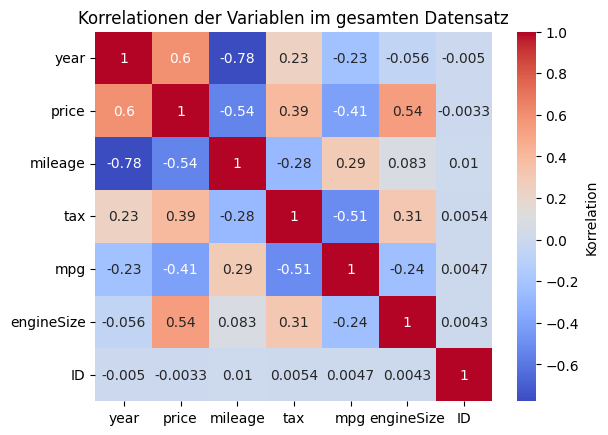

In [6]:
# Erforderliche Importe vornehmen
import seaborn as sns
import matplotlib.pyplot as plt

# Bestimmung der Korrelationen zwischen den Variablen im Datensatz
corr = train.corr()

# Illustration der Korrelation
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Korrelation'})
ax.set_title("Korrelationen der Variablen im gesamten Datensatz")
plt.show()

Feststellungen:   

*   year und millage haben eine starke negative Korrelation von -0.78.
*   year und price haben ein mittelstarke negative Korrelation von -0.54 
*   price und engineSize haben ein mittelstarke positive Korrelation von 0.54 

Je nach ausgewähltem Modell kann es sich lohnen stark korrelierte Variablen zu droppen, um das Problem der Multikollinearität zu lösen. 
 
Quelle: https://stackoverflow.com/questions/42092218/how-to-add-a-label-to-seaborn-heatmap-color-bar


In [7]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15896 entries, 0 to 15895
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15896 non-null  object 
 1   year          15896 non-null  int64  
 2   transmission  15896 non-null  object 
 3   mileage       15896 non-null  int64  
 4   fuelType      15896 non-null  object 
 5   tax           15896 non-null  int64  
 6   mpg           15896 non-null  float64
 7   engineSize    15896 non-null  float64
 8   brand         15896 non-null  object 
 9   ID            15896 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB


In [170]:
#encode categorical data
train = pd.get_dummies(train, drop_first=True)
comp_data = pd.get_dummies(comp_data, drop_first=True)

**Korrelationen der Variablen inspezieren (nach dem one-hot encoding)**

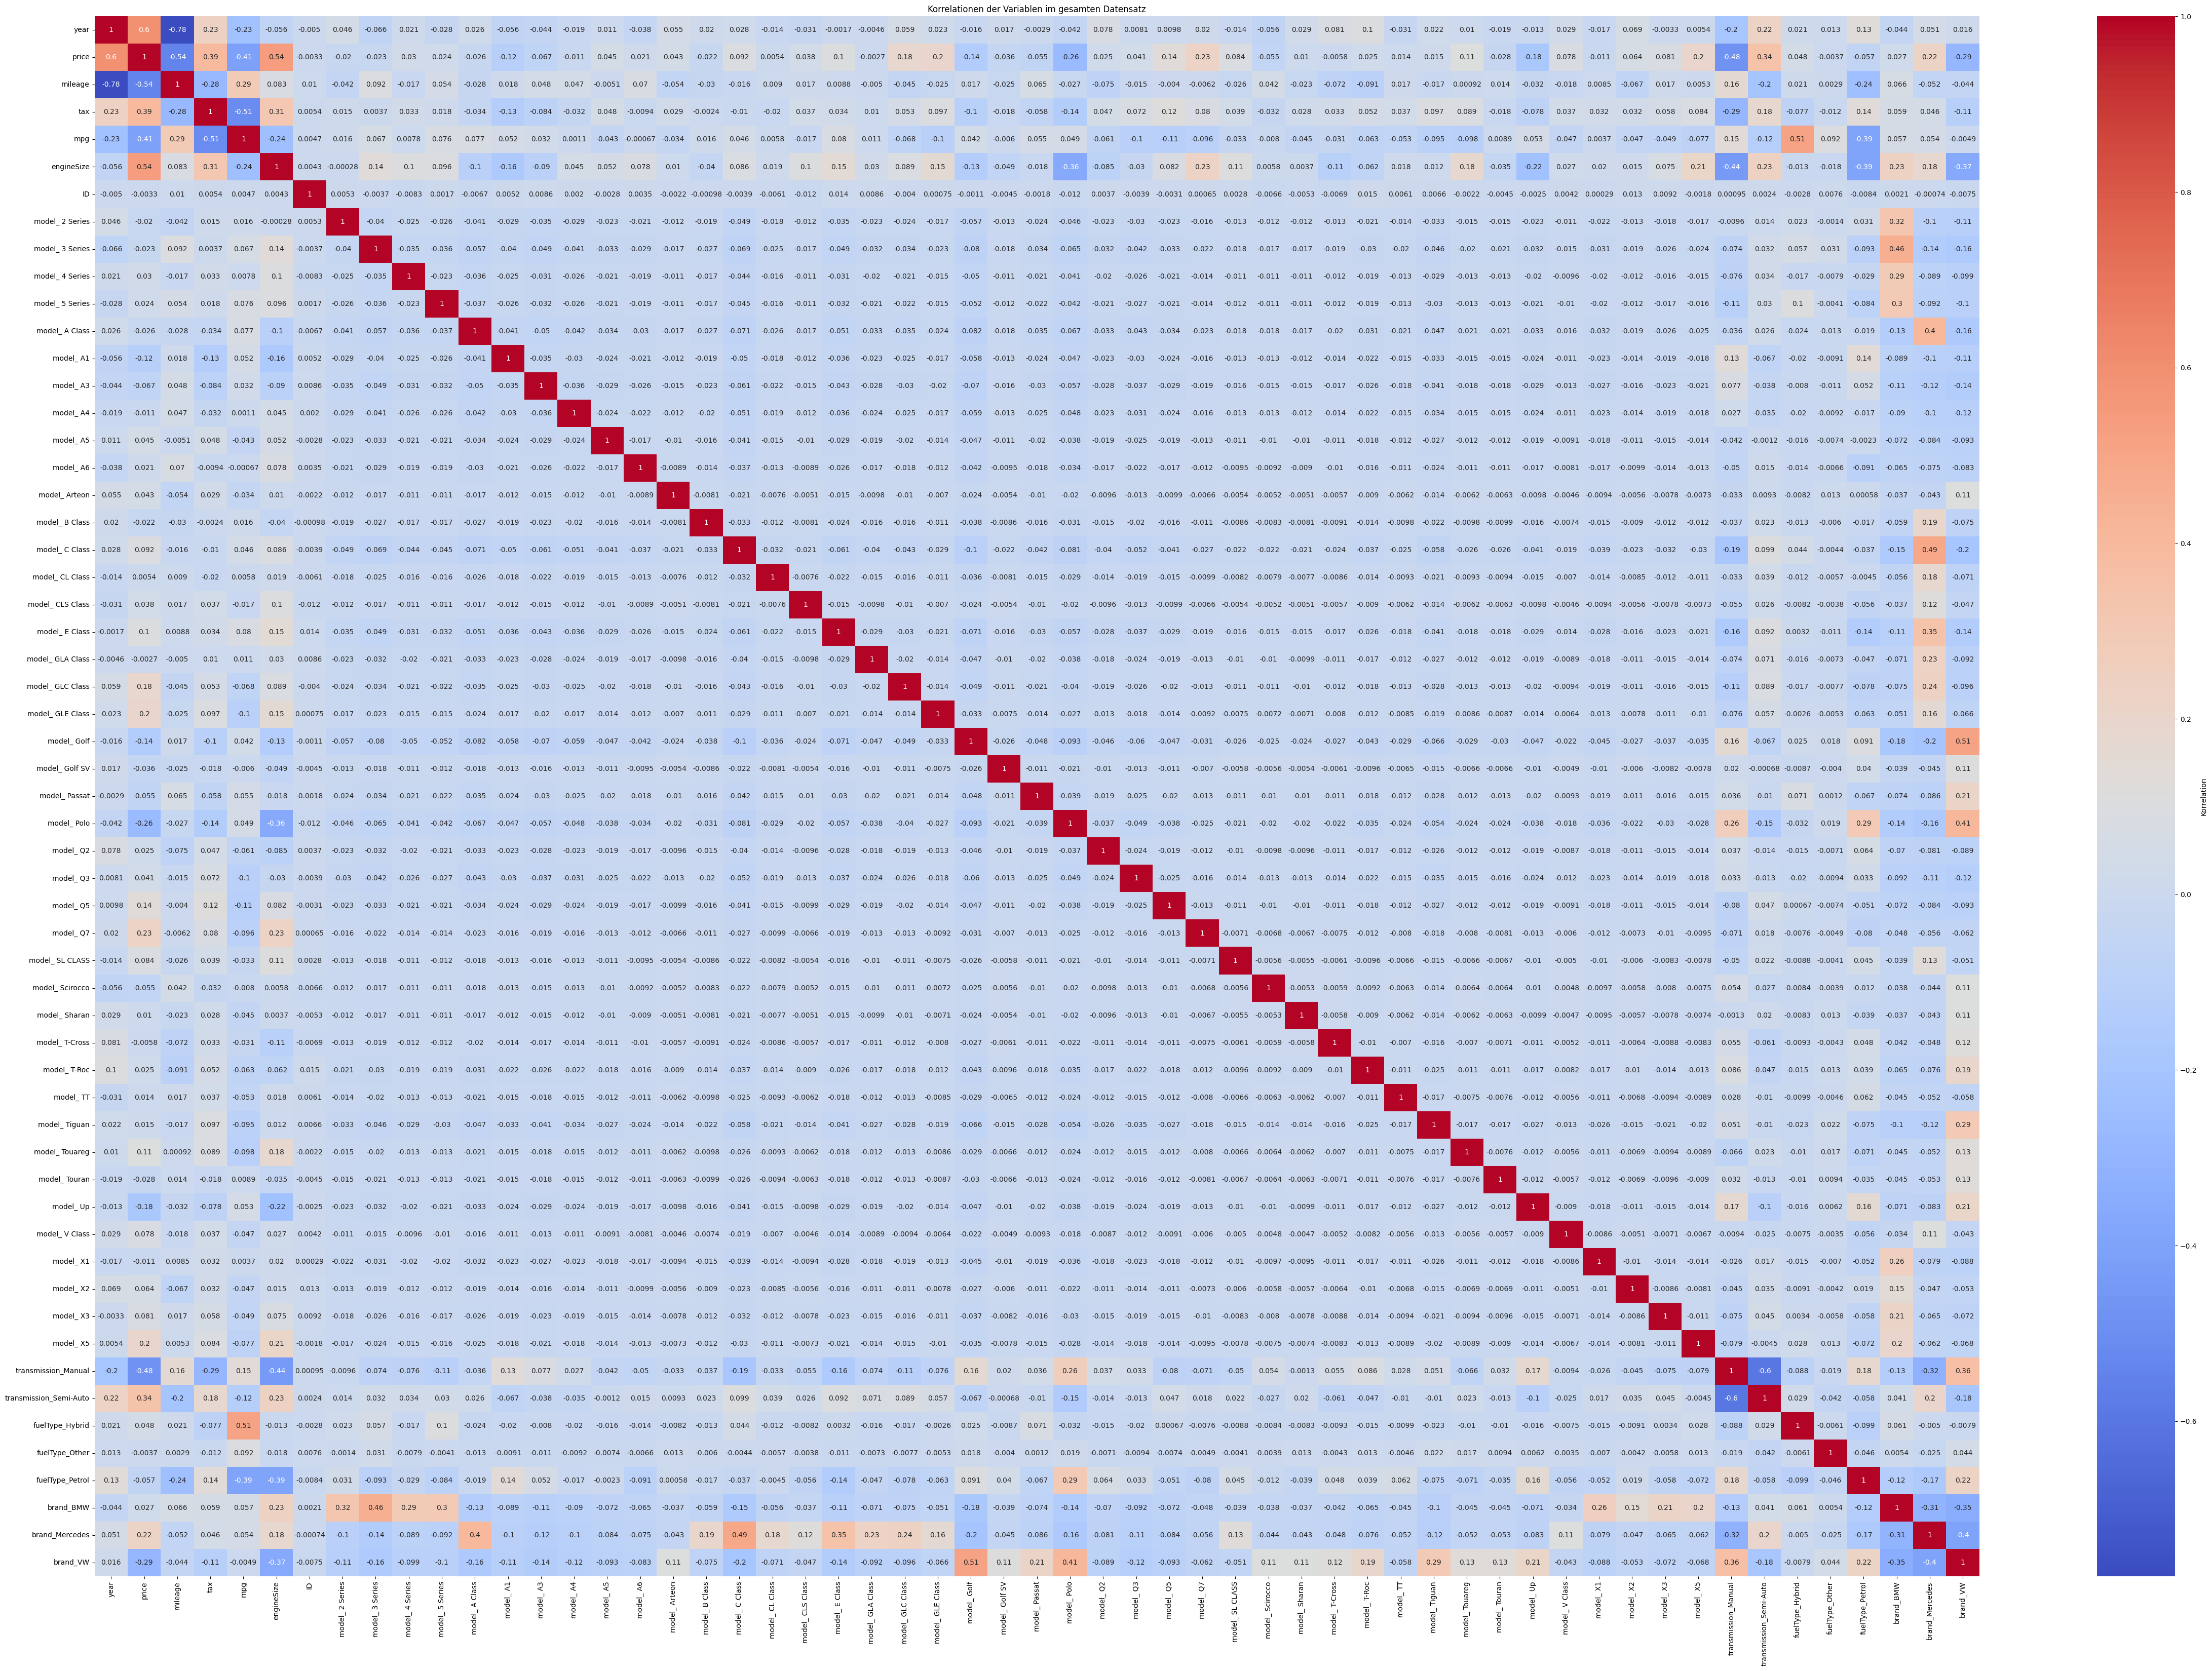

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Bestimmung der Korrelationen zwischen den Variablen im Datensatz
corr = train.corr()

# Größe der Graphik festlegen
plt.figure(figsize=(60, 40))

# Illustration der Korrelation
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Korrelation'})
ax.set_title("Korrelationen der Variablen im gesamten Datensatz")
plt.show()

# Hinweis: Mit einem Klick auf die Heatmap ist es möglich die exakten Werte zu sehen und durch diese zu scrollen

Die Variablen year und milage sind die am stärksten Korrelierten Variablen mit einem Wert von -0.78 und die einzigen Variablen mit einer Korrelation von > 0.7 oder <-0.7

# Verständnis für die Zielvariable (Preis) schaffen

<ipython-input-490-411e334ed38c>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




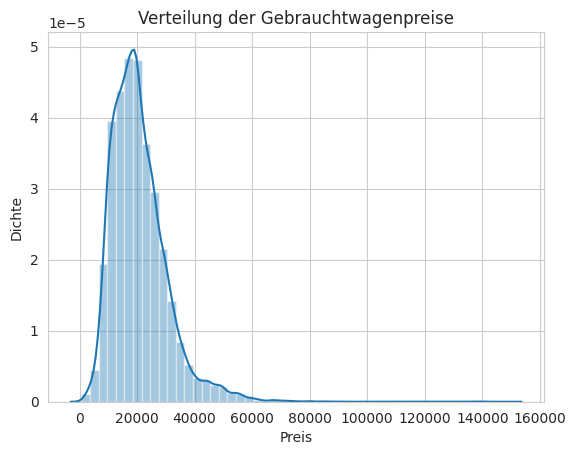

In [490]:
import seaborn as sns

sns.distplot(train["price"])
plt.title("Verteilung der Gebrauchtwagenpreise")
plt.xlabel('Preis')
plt.ylabel("Dichte")
plt.show()

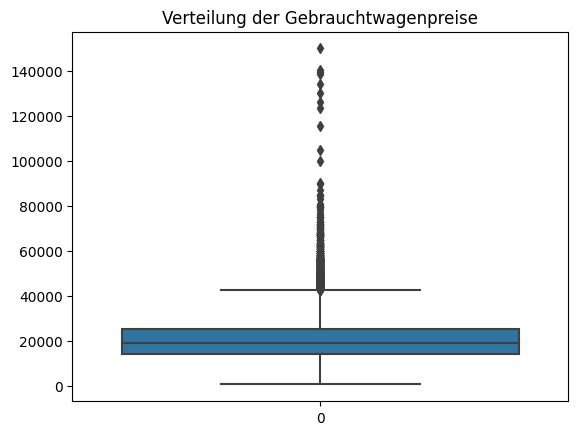

In [25]:
sns.boxplot(train["price"])
plt.title("Verteilung der Gebrauchtwagenpreise")
plt.show()

# Create Train and Test Data

In [482]:
# Importe vonehmen
from sklearn.model_selection import train_test_split

# Erstellung der Trainings- und testdaten
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# Model 1: Standard Linear Regression

## Modellerstellung

In [483]:
# Importe der Funktionen vornehmen
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Modell instanziieren
model1_lin_reg = LinearRegression()

# Modell fitten
model1_lin_reg.fit(X_train, y_train)

# Vorhersagen machen
y_pred_model1 = model1_lin_reg.predict(X_test)

# Ergebnisse interpretieren
print("R2: ", model1_lin_reg.score(X_train, y_train))

# 6) Evaluation der Generalization Performance
model1_RMSE = mean_squared_error(y_test, y_pred_model1, squared=False)
print("RMSE:", model1_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model1))

R2:  0.8200715697478147
RMSE: 3934.9876275859374
MAPE: 0.1508016010171587


## Visualisierung der Ergebnisse

### Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise

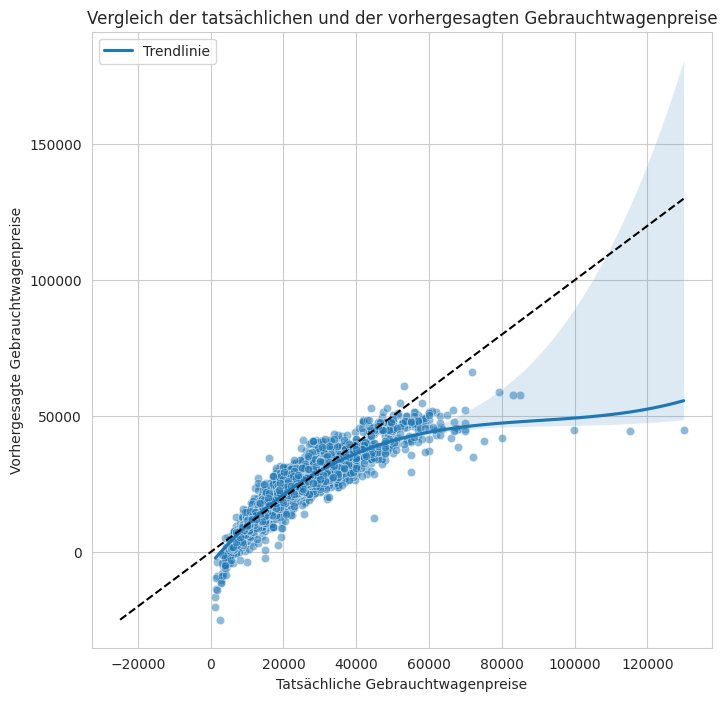

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_model1, alpha=0.5)

# Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=y_pred_model1, order=3, label="Trendlinie") # order=1 wäre für eine lineare Trendlinie


# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), y_pred_model1.min()), max(y_test.max(), y_pred_model1.max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

In [37]:
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np

# Differenz zwischen der vorhergesagten und den realen Werten berechnen
dif = y_pred_model1 - y_test

# Histogramm erstellen
fig = go.Figure(data=[go.Histogram(x=dif)])

# Diagramm-Layout festlegen
fig.update_layout(
    title="Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen",
    xaxis_title="Differenz (vorhergesagt - tatsächlich)",
    yaxis_title="Häufigkeit der Gebrauchtwagenpreise",
)

# Diagramm darstellen
pio.show(fig)

# HINWEIS: Es wurde bewusst eine andere Bibliothek ausgewählt, um diese ebenfalls zu Testen.

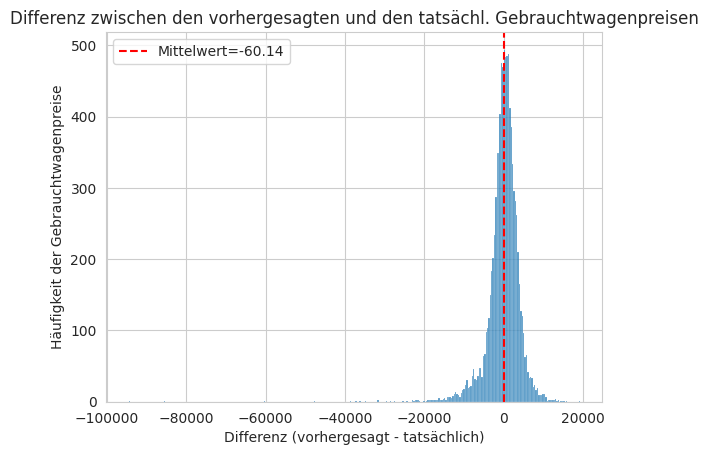

In [43]:
# HINWEIS:Inhaltlich deckengleich zur Abbildung oben. Es wurde bewusst eine zweite Grafik erstellt, um eine weitere Bibliothek zu testen.

# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = y_pred_model1 - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Model 2: Decision Tree

## Modellerstellung

In [477]:
# 1) Modell Funktionionen importieren
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# 2) Modell instanziieren
model2_dec_tree  = DecisionTreeRegressor(random_state=1)

# 3) Model zu Data fitten
reg = model2_dec_tree.fit(X_train,y_train)

# 4) Ergebnisse interpretieren
print("R2: ", reg.score(X_train, y_train))

# 5) Evaluation Generalization Performance
y_pred_model2=model2_dec_tree.predict(X_test)

model2_RMSE = mean_squared_error(y_test, y_pred_model2, squared=False)
print("RMSE:", model2_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))



R2:  1.0
RMSE: 2767.3696625126654
MAPE: 0.5950725430944862


## Visualisierung der Ergebnisse

#### Plot Regression Tree 

In [ ]:
def plot_tree_regression(treemodel, X_train):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(30,20))
    _ = tree.plot_tree(treemodel, feature_names=X_train.columns, filled=True, precision=2)

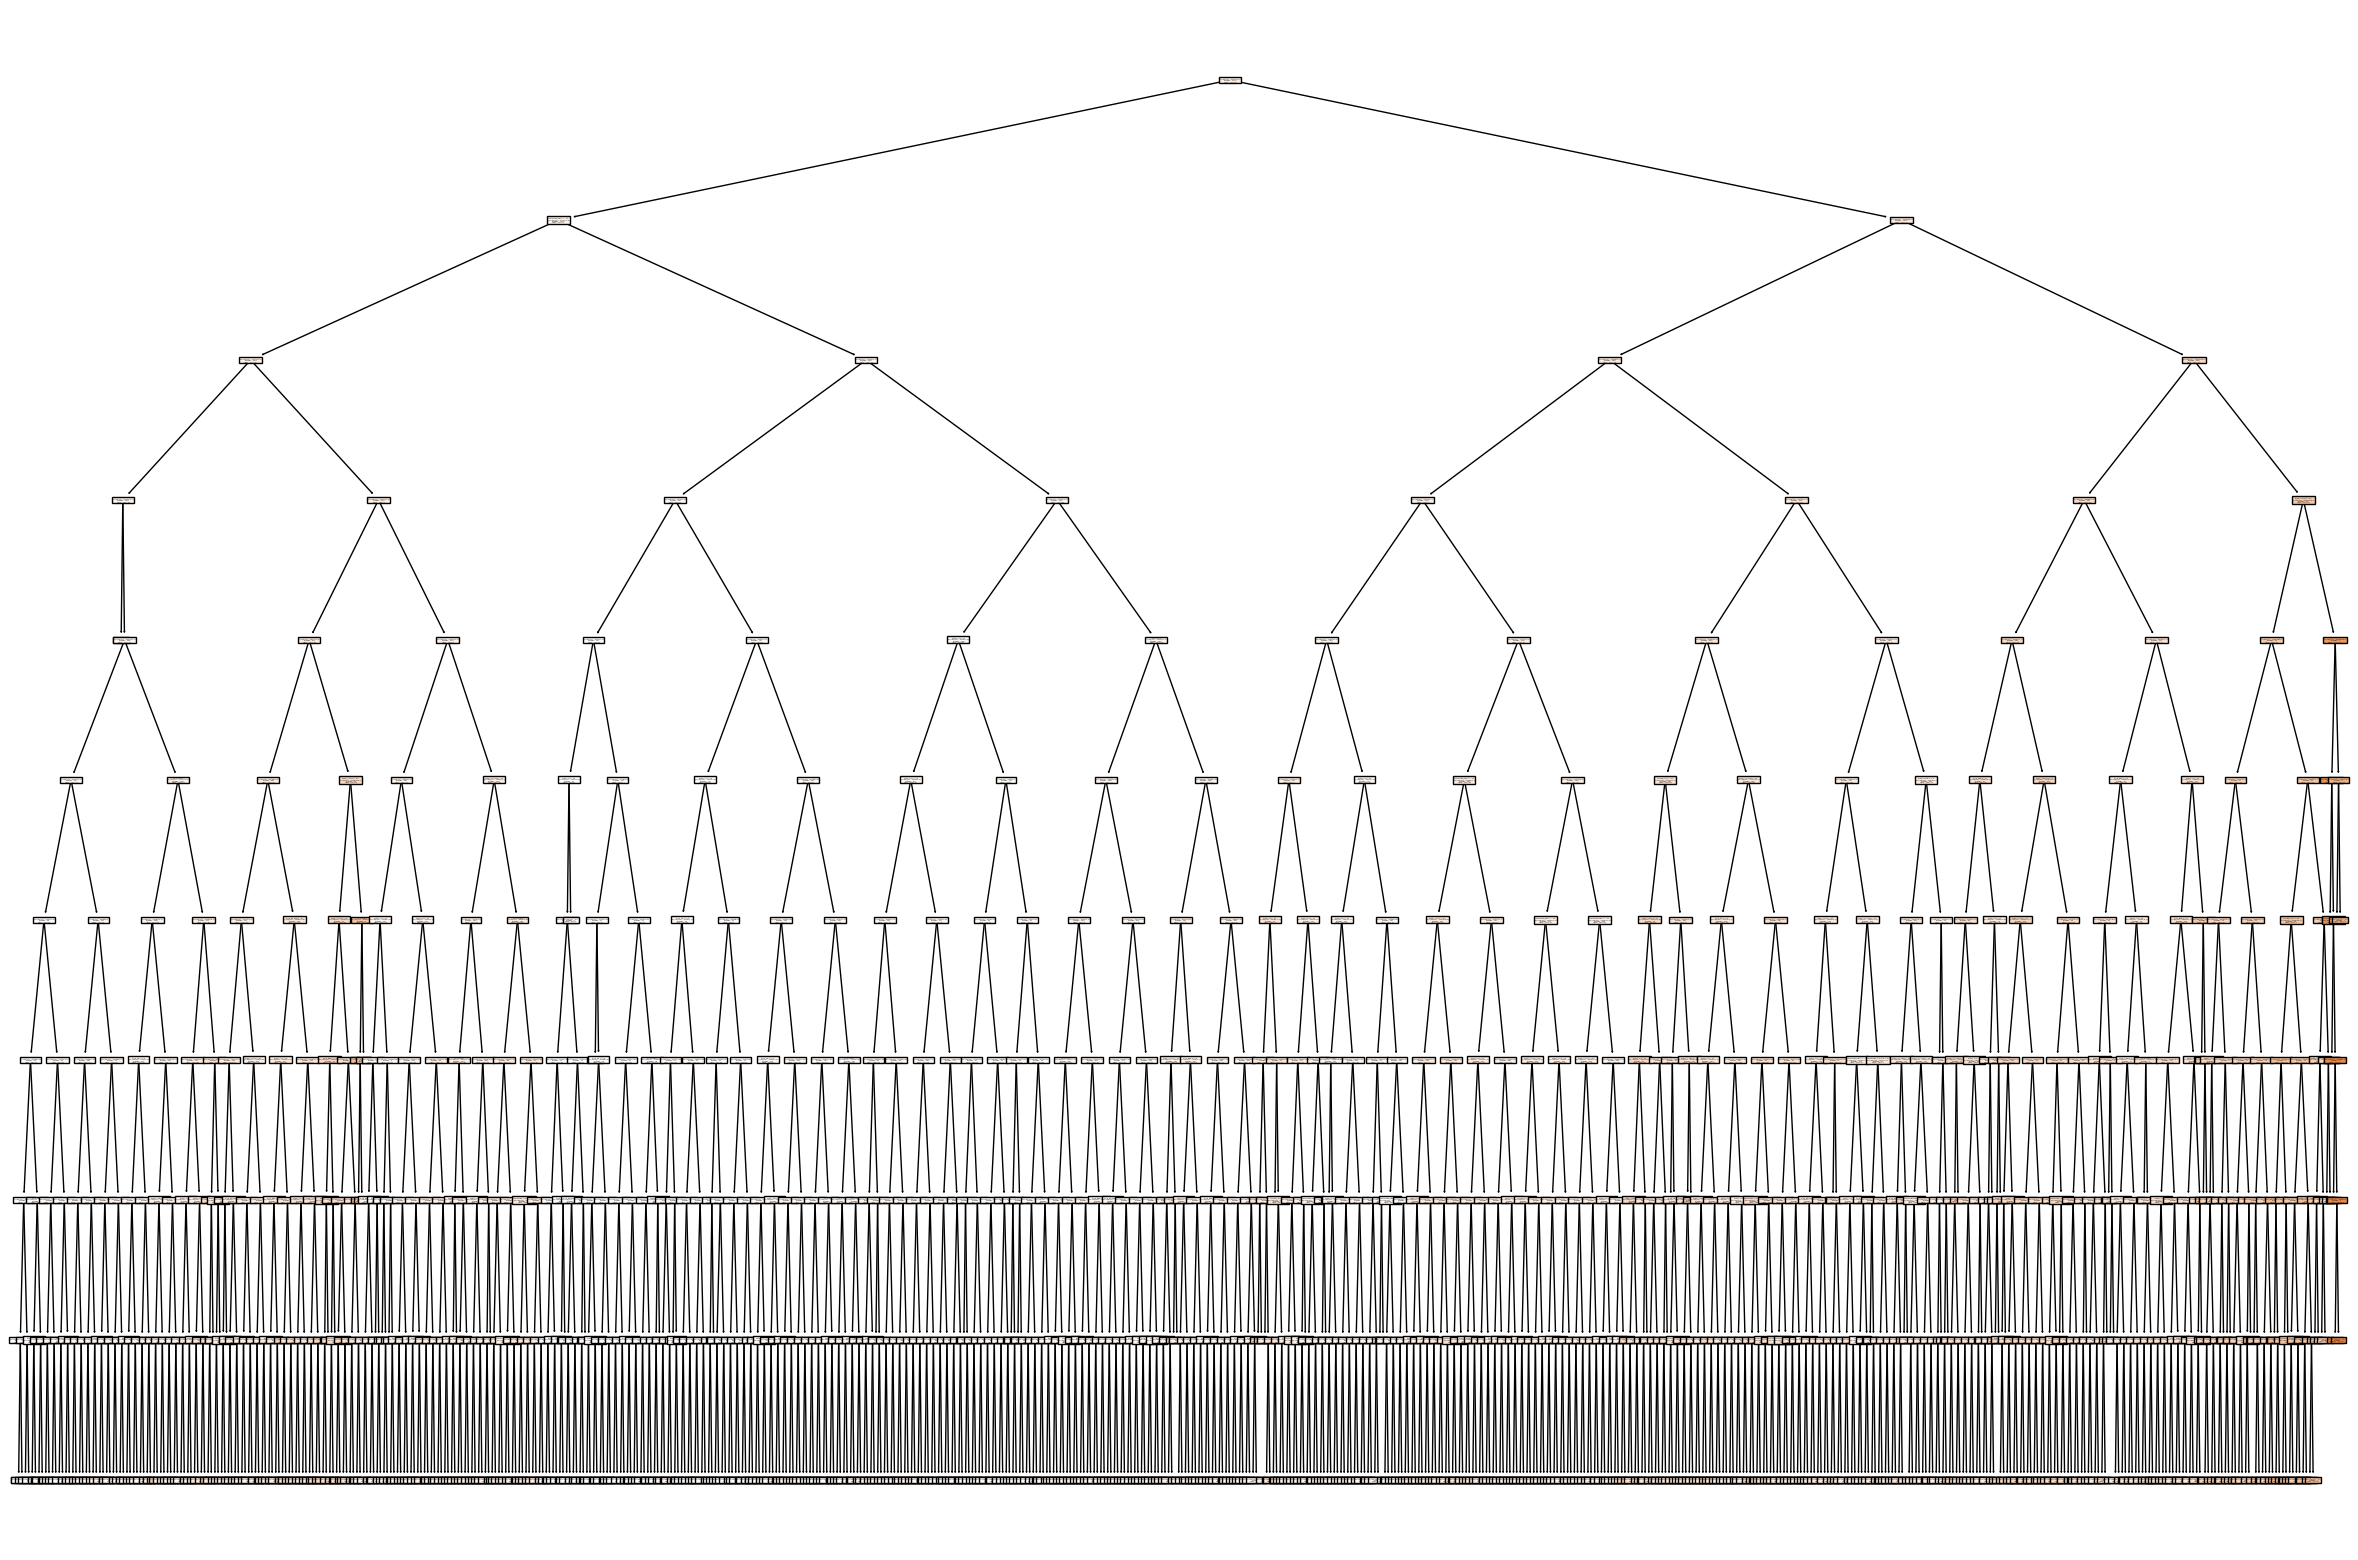

In [ ]:
plot_tree_regression(reg, X_train)

### Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise

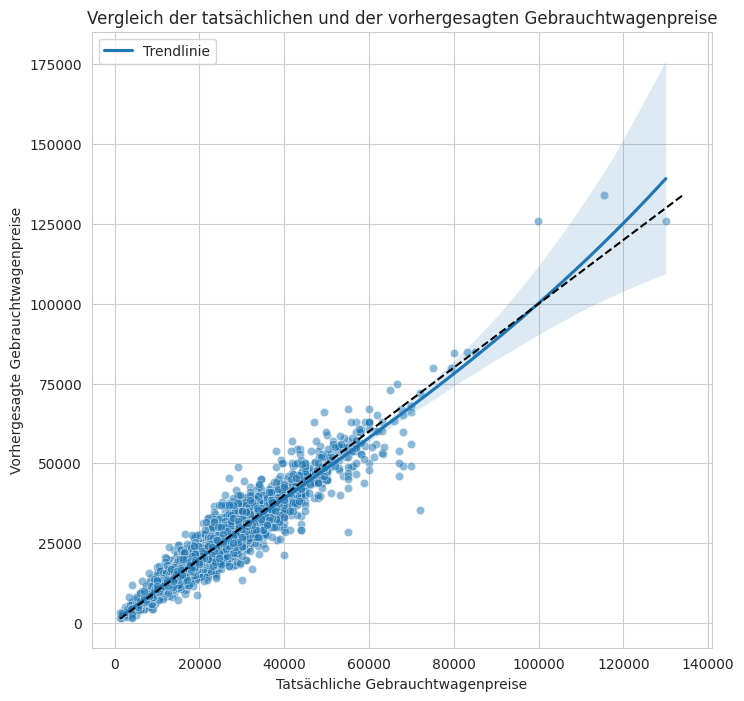

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_model2, alpha=0.5)

# Nicht-lineare Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=y_pred_model2, order=3, label="Trendlinie")

# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), y_pred_model2.min()), max(y_test.max(), y_pred_model2.max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

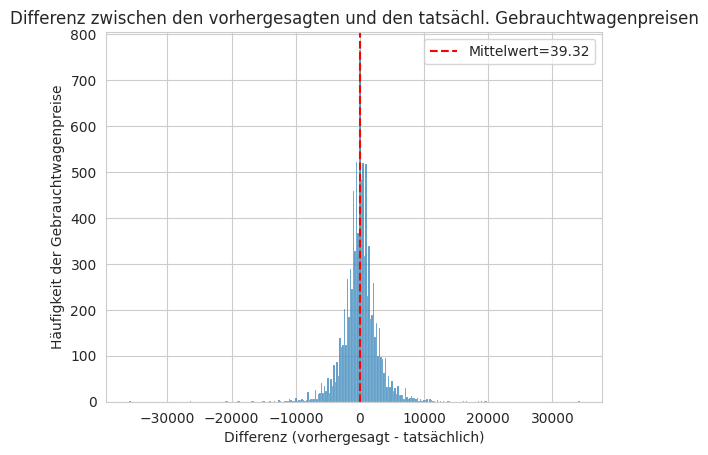

In [51]:
# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = y_pred_model2 - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Model 3.1: Random Forest

In [497]:
# 1) Modell Funktionen importieren
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 2) Test und Trainingsdaten definieren (Hinweis: Bewusst nochmal hier drin, damit dieser Codeteil eigenständig ausführbar ist.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# 3) Modell instanziieren
model3_rf  = RandomForestRegressor(random_state=1)

# 4) Modell zu Data fitten
reg = model3_rf.fit(X_train,y_train)

# 5) Ergebnisse interpretieren
print("R2: ", reg.score(X_train, y_train))

# 6) Evaluation Generalization Performance
y_pred_model3 =model3_rf.predict(X_test)
model3_RMSE = mean_squared_error(y_test, y_pred_model3, squared=False)
print("RMSE:", model3_RMSE )
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model3))

R2:  0.9906566049697021
RMSE: 2106.1078115050723
MAPE: 0.07161473107386704


Optimierung des Randem_States in den Testdaten

Annahme: Die Daten sind nicht gleichmäßig verteilt, sodass der RMSE-Wert durch Anpassung des random_state verbessert werden kann

In [87]:
# 1) Importiere Modell Funktionen
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

random_state_value = 1
results_random_state_comparison = []
for random_state in range(1, 51):
  # 2) Definiere Trainings- und Testdaten
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_value)

  # 3) Model instanziieren
  model3_rf  = RandomForestRegressor(random_state=1)

  # 4) Fit Model to Data
  reg = model3_rf.fit(X_train,y_train)

  # 5) Ergebnisse interpretieren
  print("R2: ", reg.score(X_train, y_train))

  # 6) Evaluation Generalization Performance
  y_pred=model3_rf.predict(X_test)
  RMSE_value = mean_squared_error(y_test, y_pred, squared=False)
  print("RMSE:", RMSE_value)
  # print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
  print(f"random state:  {random_state_value}")

  results_random_state_comparison.append((random_state_value, RMSE_value))
  random_state_value = random_state_value+1

df_random_state_results = pd.DataFrame(results_random_state_comparison, columns=['Random State', 'RMSE'])
print(df_random_state_results)

# Ergebnis:
# Top 3 random_states
# randam_state 21 -> RMSE 2100
# random_state 29 -> RMSE 2106
# random_state 02 -> RMSE 2121

# Konsequenz: Es wird nur noch random_state 29 verwendet. Random_state 21 wurde bei Kaggle mit dem Modell getestet und hat 
#             leicht schleichtere Ergebnisse geliefert. Daher wurde bewusst 29 gewählt.
#             Bei dem vorherigen Modell wurde der random_state auf 29 angepasst.

R2:  0.9915612727902723
RMSE: 2449.7151626979835
random state:  1
R2:  0.9928225179597054
RMSE: 2685.040766792924
random state:  2
R2:  0.9917459346000639
RMSE: 2441.2493486619856
random state:  3
R2:  0.9910809980958666
RMSE: 2172.148482770569
random state:  4
R2:  0.9919654088007972
RMSE: 2614.494772283284
random state:  5
R2:  0.991112863395415
RMSE: 2151.4079752974644
random state:  6
R2:  0.9911130450256084
RMSE: 2169.8962354477767
random state:  7
R2:  0.9906700612134879
RMSE: 2171.837009562208
random state:  8
R2:  0.992358597604897
RMSE: 2526.5760715425813
random state:  9
R2:  0.9920255248807276
RMSE: 2556.864463068386
random state:  10
R2:  0.9912749730564303
RMSE: 2254.6531458991826
random state:  11
R2:  0.9908502436649868
RMSE: 2276.1184926094975
random state:  12
R2:  0.9931034664663505
RMSE: 2796.147566737939
random state:  13
R2:  0.9921762883659422
RMSE: 2639.2778419693423
random state:  14
R2:  0.9913257668747519
RMSE: 2154.162122024942
random state:  15
R2:  0.991531

In [89]:
df_random_state_results

Random State         RMSE
0              1  2449.715163
1              2  2685.040767
2              3  2441.249349
3              4  2172.148483
4              5  2614.494772
5              6  2151.407975
6              7  2169.896235
7              8  2171.837010
8              9  2526.576072
9             10  2556.864463
10            11  2254.653146
11            12  2276.118493
12            13  2796.147567
13            14  2639.277842
14            15  2154.162122
15            16  2453.032758
16            17  2152.561917
17            18  2481.698620
18            19  2545.457270
19            20  2121.820179
20            21  2100.025505
21            22  2231.544498
22            23  2826.857728
23            24  2539.482349
24            25  2550.106275
25            26  2456.014388
26            27  2779.482767
27            28  2549.037121
28            29  2106.107812
29            30  2557.302585
30            31  2143.835816
31            32  2435.391385
32            33  2478.639862
33            34  2448.583946
34            35  2284.626830
35            36  2572.145152
36            37  2516.103013
37            38  2613.355459
38            39  2452.235425
39            40  2657.236557
40            41  2160.128636
41            42  2641.752849
42            43  2231.111654
43            44  2184.972675
44            45  2614.001755
45            46  2868.880067
46            47  2795.244671
47            48  2594.720969
48            49  2751.063449
49            50  2124.895431

## Visualisierung der Ergebnisse

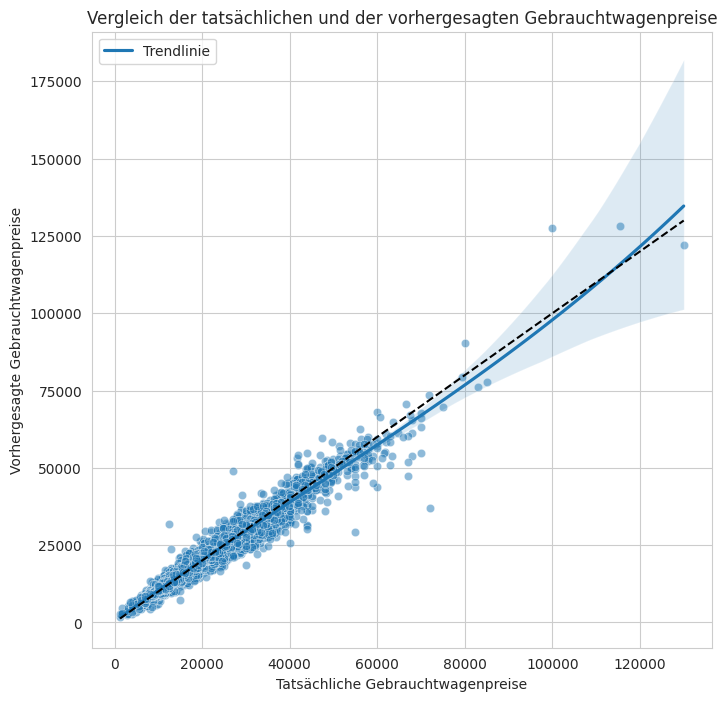

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_model3, alpha=0.5)

# Nicht-lineare Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=y_pred_model3, order=3, label="Trendlinie")

# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), y_pred_model3.min()), max(y_test.max(), y_pred_model3.max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

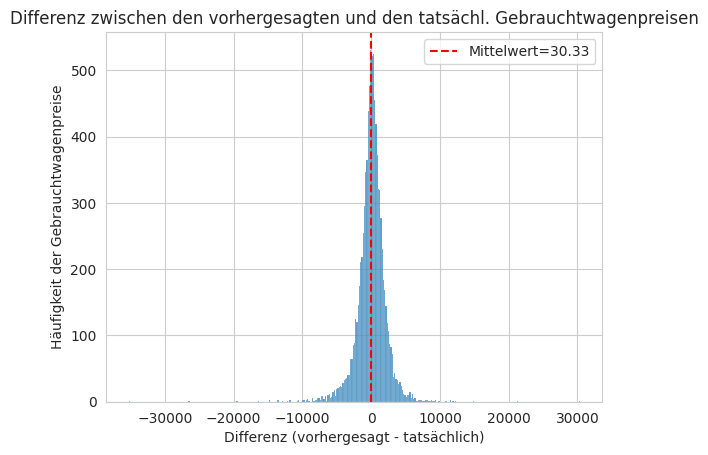

In [86]:
# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = y_pred_model3 - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Model 3.2: Random Forest with Cross Validation and Hyperparameteroptimierung

Versuch 1 (Model 3.2.1)

In [ ]:
# Testzeitpunkt: 18:30, 16.4 
# Testdauer: 25 Min

# 1) Importiere Modell Funktionen
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer

# 2) Definiere Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# 3) Modell instanziieren
model3_2_1_rf  = RandomForestRegressor(random_state=1)

# 4) Definiere hyperparameter für RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'min_samples_split': [2, 5, 10] 
}

# 5) Definiere RandomizedSearchCV object
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
model3_2_1_rf_CV = GridSearchCV(model3_2_1_rf, param_grid, cv=5, scoring=RMSE, verbose=3)

# 6) Fit RandomizedSearchCV auf Daten 
model3_2_1_rf_CV_fitted = model3_2_1_rf_CV.fit(X_train, y_train)

# 7) Ergebnisse interpretieren
print("Best hyperparameters:", model3_2_1_rf_CV_fitted.best_params_)
# print("R2: ", model3_2_1_rf_CV.score(X_train, y_train))

# 8) Evaluation Generalization Performance
y_pred_model3_2_1 = model3_2_1_rf_CV.predict(X_test)

model3_2_1_RMSE = mean_squared_error(y_test, y_pred_model3_2_1, squared=False) 

print("RMSE:", model3_2_1_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model3_2_1))


# GETESTET:
# param_grid = {
#     'n_estimators': [50, 100, 200, 500],
#     'min_samples_split': [2, 5, 10] 
# }
#
# Testergebnis:
#Best hyperparameters: {'min_samples_split': 5, 'n_estimators': 500}
#RMSE: 2104.9685670410026
#MAPE: 0.07115887524356294

Versuch 2 (Model 3.2.2)

In [ ]:
# Testzeitpunkt: 18:30, 16.4 
# Testdauer > 2h

# 1) Importiere Modell Funktionen
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer

# 2) Define Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29) #danach wieder auf 29 setzen

# 3) Instantiate Model
model3_2_2_rf  = RandomForestRegressor(random_state=1)

# 4) Definiere hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [500,700,1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4],
}

# 5) Definiere GridSearchCV object
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
model3_2_2_rf_CV = GridSearchCV(model3_2_2_rf, param_grid, cv=5, scoring=RMSE, return_train_score = True, verbose=3)

# 6) Fit GridSearchCV to data 
model3_2_2_rf_CV_fitted = model3_2_2_rf_CV.fit(X_train, y_train)


# GETESTET 
# param_grid = {
#     'n_estimators': [500,700,1000],
#     'max_depth': [10, 20, 30, 40, None],
#    # 'min_samples_split': [2, 5, 10] #,
#     'min_samples_leaf': [1, 2, 4],
#     #'max_features': ['auto', 'sqrt', 'log2']
# }
#
# Testergebnis:
# Best hyperparameters: {'n_estimators': 1000, 'min_samples_leaf': 1, 'max_depth': 30} #randon_state=29 im train test split
# RMSE: 2096.523449203064
# MAPE: 0.07111575719955428
######################

In [310]:
# 7) Interpretiere Ergebnisse
print("Best hyperparameters:", reg.best_params_)
# print("R2: ", clf.score(X_train, y_train))

# 8) Evaluation Generalization Performance
y_pred_model3_2_2 = model3_2_2_rf_CV.predict(X_test)
model3_2_2_RMSE = mean_squared_error(y_test, y_pred_model3_2_2, squared=False) 
print("RMSE:", model3_2_2_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model3_2_2))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 1000}
RMSE: 2096.523449203064
MAPE: 0.07111575719955428


In [128]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

## Visualisierung der Ergebnisse

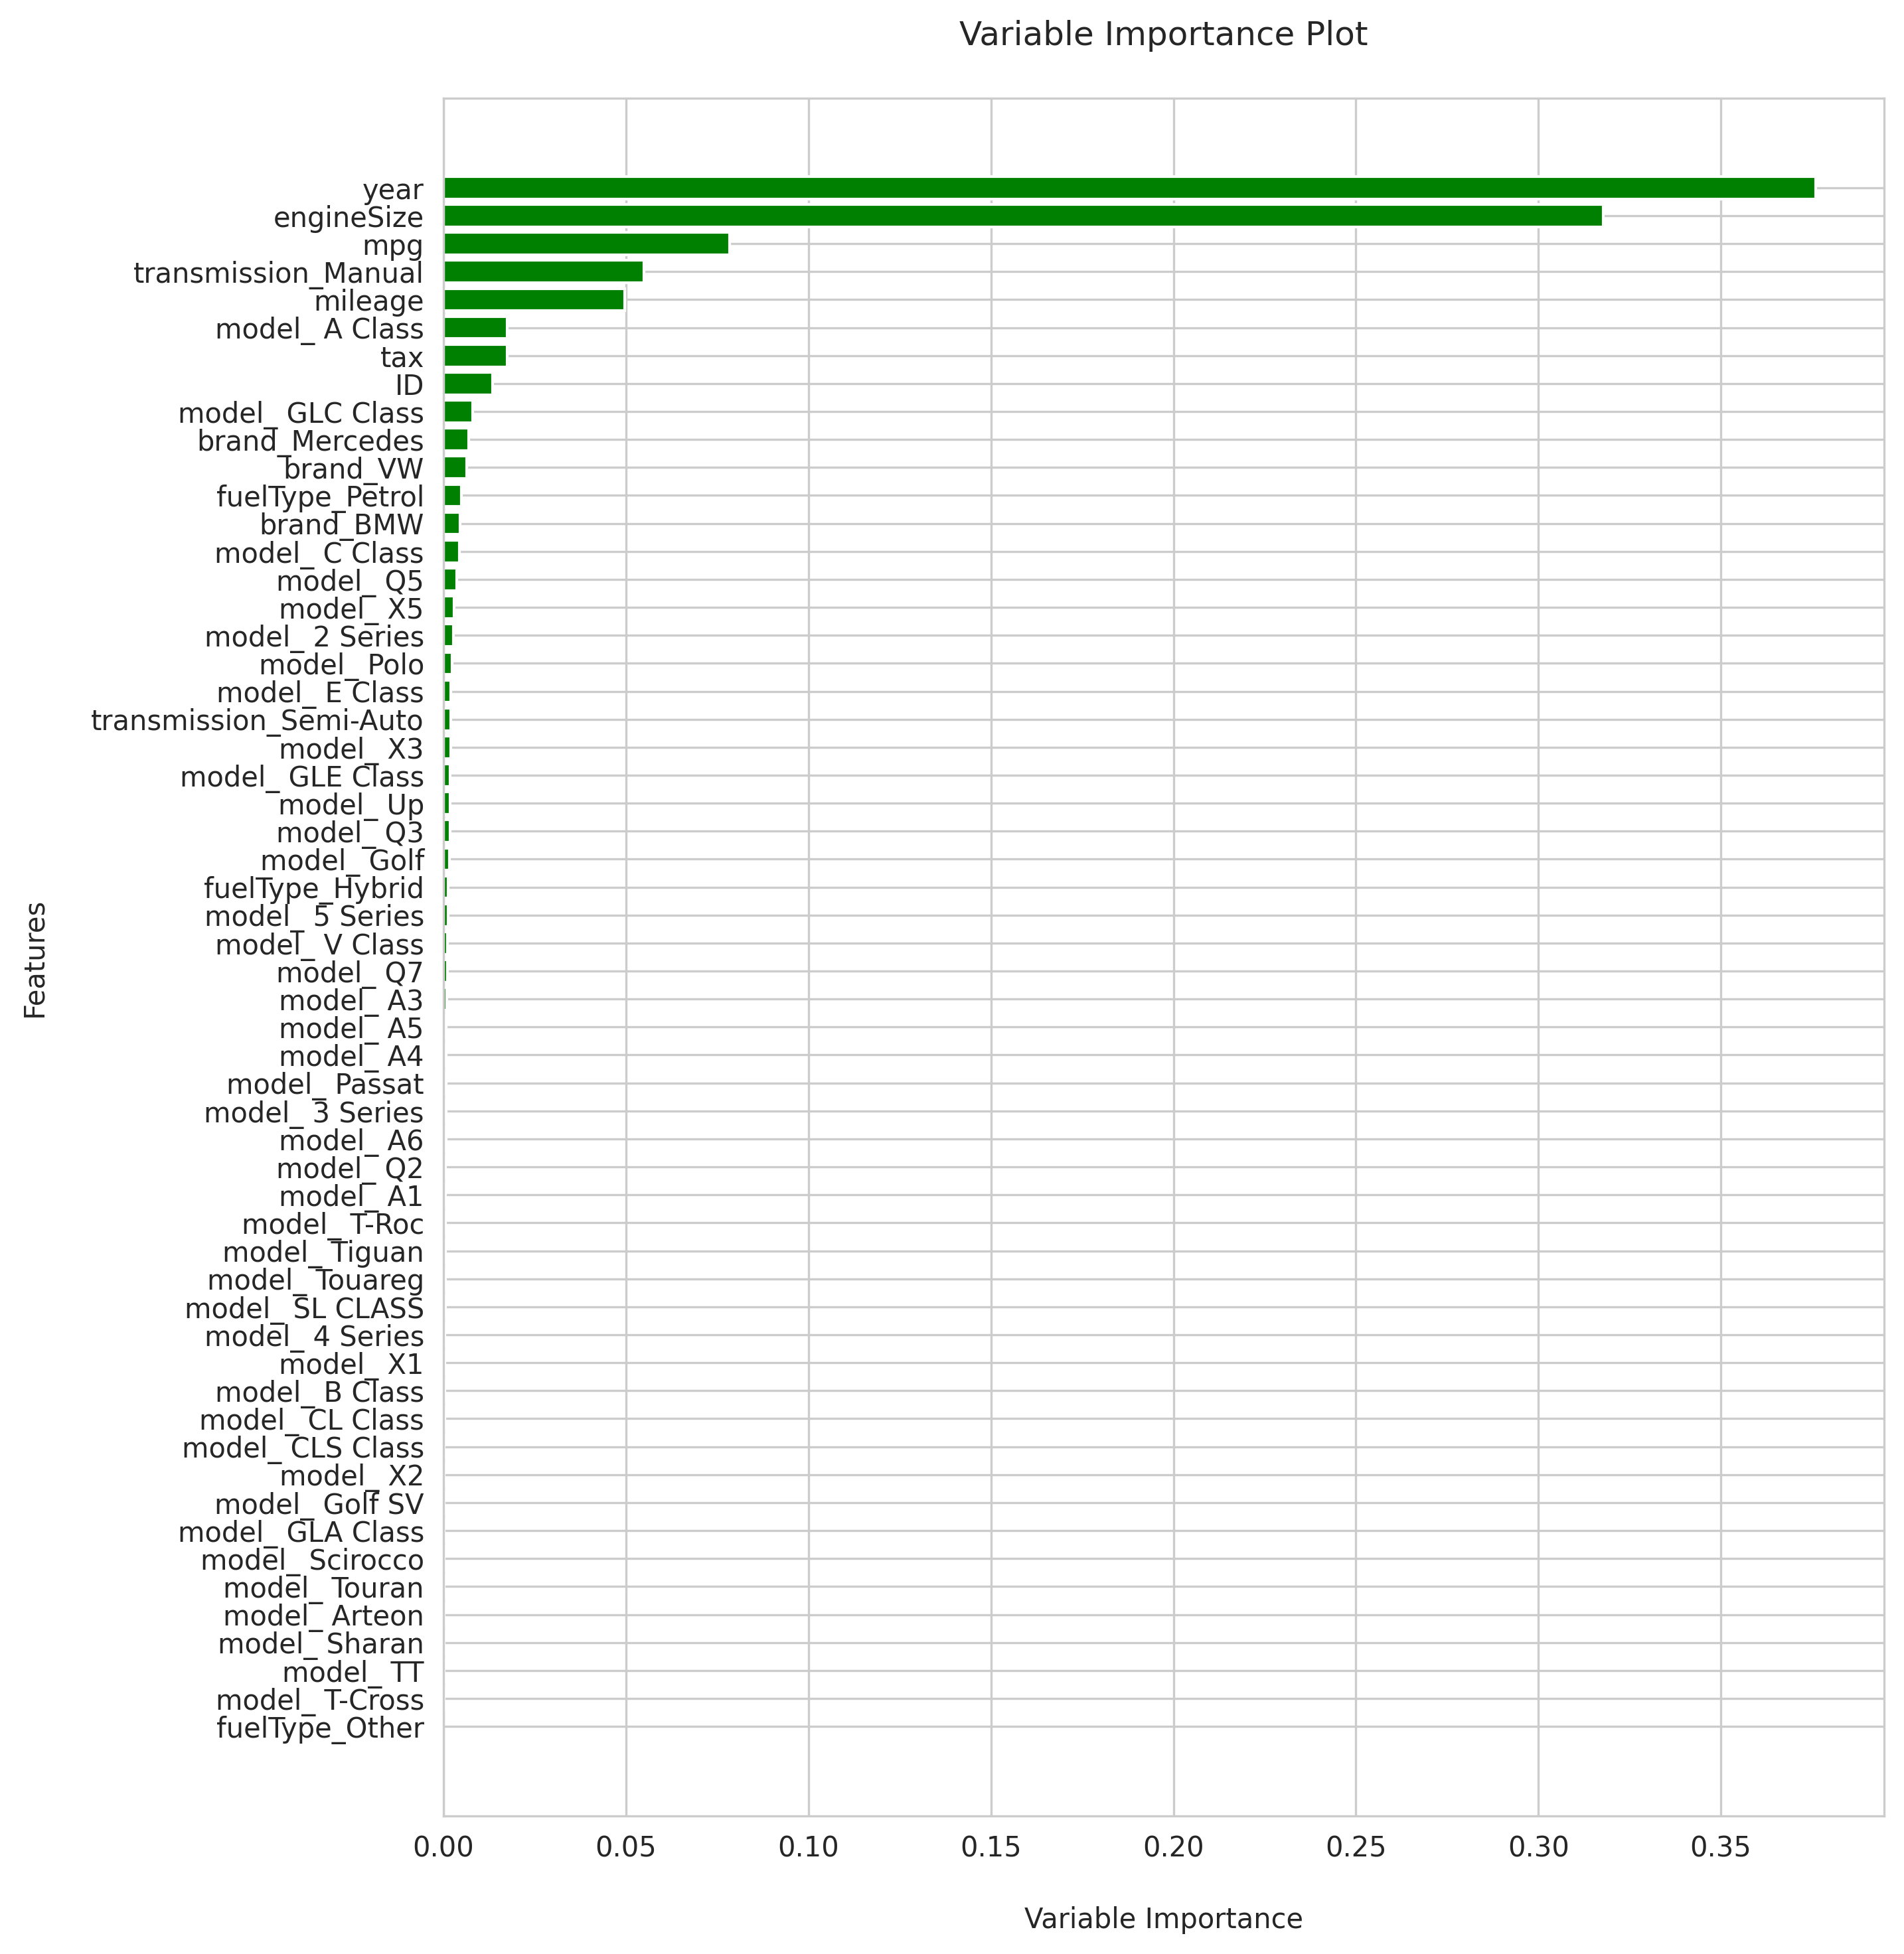

In [133]:
plot_variable_importance(model3_2_2_rf_CV_fitted.best_estimator_, X_train)

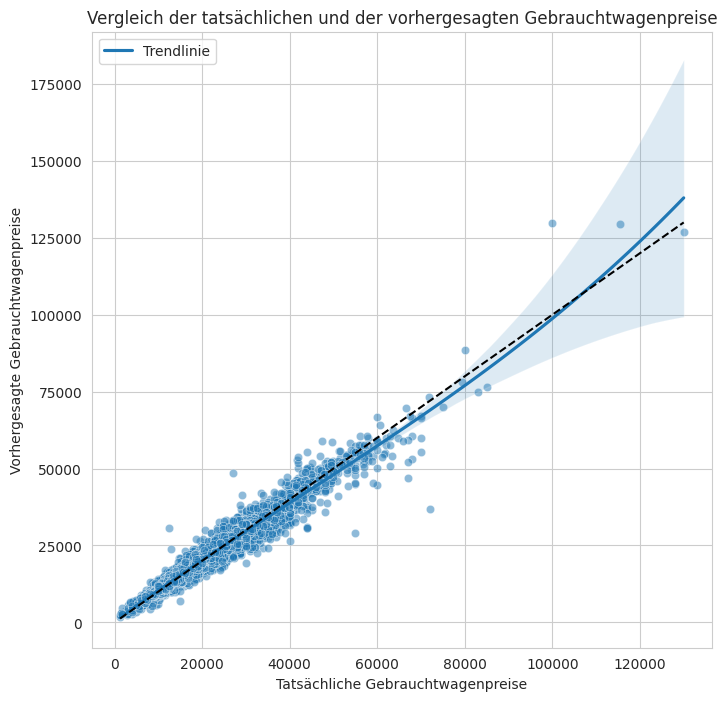

In [523]:
# Erforderlichen Bibliotheken importieren
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_model3_2_2, alpha=0.5)

# Nicht-lineare Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=y_pred_model3_2_2, order=3, label="Trendlinie")

# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), y_pred_model3_2_2.min()), max(y_test.max(), y_pred_model3_2_2.max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

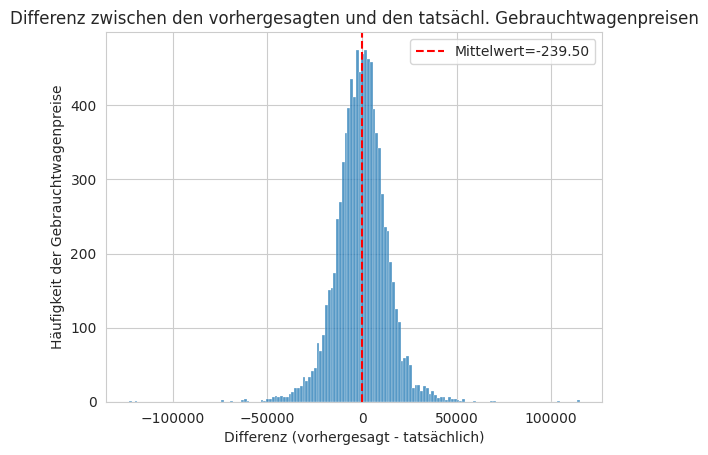

In [137]:
# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = y_pred_model3_2_2 - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Model 4.1: XGBoost Regressor

In [ ]:
# pip install -U xgboost
# pip install -U xgboost --user # WICHTIG: War erforderlich für die neuste Version von xgboost -> Sonst import error

In [404]:
# 1) Importiere Modell Funktionen
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# 2) Definiere Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# 3) Modell instanziieren
model4_XGBoostReg  = XGBRegressor()

# 4) Fit Model to Data
model4_XGBoostReg_fitted = model4_XGBoostReg.fit(X_train,y_train)

# 5) Evaluation Generalization Performance
y_pred_model4_1=model4_XGBoostReg.predict(X_test)
model4_RMSE = mean_squared_error(y_test, y_pred_model4_1, squared=False)
print("RMSE:", model4_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model4_1))

RMSE: 2042.173650024046
MAPE: 0.07362528176829615


# Model 4.2: XGBoost Regressor (CV + Hyperparameter Optimierung)

Versuch 1 (Model 4.2.1)

In [ ]:
# Testzeitpunkt: 11:30, 16.4 
# Testdauer: 20 min

# 1) Importiere Modell Funktionen
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# 2) Definiere Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# 3) Instanziiere Modell
model4_2_1_XGBoost = XGBRegressor()

# 4) Fit model
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function

hyperparameter_grid = {'n_estimators': [50, 100, 400],
              'max_depth': [3, 5,7],
              'learning_rate': [0.1],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'subsample': [0.6, 0.8, 1.0],
              'reg_alpha': [0.01, 0.1, 1],
              # 'reg_lambda': [0.01, 0.1, 1]
              }

# 5) Random search with cross validation
model4_2_1_XGBoost_CV = RandomizedSearchCV(model4_2_1_XGBoost,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=150,     # Hinweis: Testet nur 50 Stück -> laut Inet recht wenig
            scoring = RMSE,n_jobs = 1,
            verbose = 3, 
            return_train_score = True,
            random_state=42)

# 6) Fitting auf training data
model4_2_XGBoost_CV_fitted = model4_2_1_XGBoost_CV.fit(X_train,y_train)

# 7) Interpretation der Ergebnisse
print("Best hyperparameters:", model4_2_XGBoost_CV_fitted.best_params_)

# 8) Evaluation Generalization Performance
y_pred_model4_2_1 = model4_2_1_XGBoost_CV.predict(X_test)

model4_2_1_RMSE = mean_squared_error(y_test, y_pred_model4_2_1, squared=False) 

print("RMSE:", model4_2_1_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model4_2_1))

#################################################################################
# GETESTET 
# hyperparameter_grid = {'n_estimators': [50, 100, 400],
#               'max_depth': [3, 5,7],
#               'learning_rate': [0.1],
#               'colsample_bytree': [0.6, 0.8, 1.0],
#               'subsample': [0.6, 0.8, 1.0],
#               'reg_alpha': [0.01, 0.1, 1],
#               # 'reg_lambda': [0.01, 0.1, 1]
#               }
#
# Testergebnis:
# Best hyperparameters: {'subsample': 1.0, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
# RMSE:  2033.2468913201183
#################################################################################

# Source: https://stackoverflow.com/questions/69786993/tuning-xgboost-hyperparameters-with-randomizedsearchcv

Versuch 2 (Model 4.2.2) - Optimierung des Random_State beim train_test_split
Hypothese: Daten werden ungleich verteilt beim Train-Test-Split und durch die Optimierung kann dies verbessert werden. 
Wurde bei Kaggle getestet und hat zu einer Verbesserung geführt.

Schritt 1 - Mittels for-Schleife die niedrigsten RMSE x random_state Paarung ermitteln

In [153]:
# Testzeitpunkt: 18:05, 16.4 
# Testdauer: 
# Hinweis: Wie Modell 4.2.1, nur dass random_state noch optimiert wird

# 1) Import Model Functions
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


# 2) Setup to check random_state
random_state_value = 1
results_random_state_comparison = []
for random_state in range(1, 51):

  # 3) Define Train and Test Data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_value) 

  # 4) Instantiate Model
  model4_2_2_XGBoost = XGBRegressor(subsample = 1.0, reg_alpha= 0.1, n_estimators= 400, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.6)

  # 5) Fitting to training data
  model4_2_2_XGBoost_fitted = model4_2_2_XGBoost.fit(X_train,y_train)

  # 6) Evaluate Generalization Performance
  y_pred_model4_2_2 = model4_2_2_XGBoost.predict(X_test)

  model4_2_2_RMSE = mean_squared_error(y_test, y_pred_model4_2_2, squared=False) 

  print("RMSE:", model4_2_2_RMSE)

  print(f"random state:  {random_state_value}")

  results_random_state_comparison.append((random_state_value, model4_2_2_RMSE))
  random_state_value = random_state_value+1

df_random_state_results = pd.DataFrame(results_random_state_comparison, columns=['Random State', 'RMSE'])
print(df_random_state_results)

RMSE: 2304.6556138570713
random state:  1
RMSE: 2398.483840026278
random state:  2
RMSE: 2320.1777665381373
random state:  3
RMSE: 2019.861337320113
random state:  4
RMSE: 2371.1034333381544
random state:  5
RMSE: 1978.1665816519512
random state:  6
RMSE: 2000.8556114037292
random state:  7
RMSE: 2079.3417578271096
random state:  8
RMSE: 2389.253508832878
random state:  9
RMSE: 2345.2821724770047
random state:  10
RMSE: 2017.2040382036125
random state:  11
RMSE: 2033.2468913201183
random state:  12
RMSE: 2655.387617849641
random state:  13
RMSE: 2396.355967934655
random state:  14
RMSE: 2038.1560022591111
random state:  15
RMSE: 2330.9264963694936
random state:  16
RMSE: 2025.1929338929335
random state:  17
RMSE: 2297.441200418404
random state:  18
RMSE: 2286.534901095882
random state:  19
RMSE: 1979.5160743461408
random state:  20
RMSE: 2042.7956403912015
random state:  21
RMSE: 2068.064890421735
random state:  22
RMSE: 2617.544416414024
random state:  23
RMSE: 2335.222936845777
rando

In [154]:
df_random_state_results

# TOP 5
# Random_State RMSE
# 50	          1977.8332089553794
# 6	            1978.1665816519512
# 20	          1979.5160743461408
# 7	            2000.8556114037292
# 29	           2003.0234450382115

Random State         RMSE
0              1  2304.655614
1              2  2398.483840
2              3  2320.177767
3              4  2019.861337
4              5  2371.103433
5              6  1978.166582
6              7  2000.855611
7              8  2079.341758
8              9  2389.253509
9             10  2345.282172
10            11  2017.204038
11            12  2033.246891
12            13  2655.387618
13            14  2396.355968
14            15  2038.156002
15            16  2330.926496
16            17  2025.192934
17            18  2297.441200
18            19  2286.534901
19            20  1979.516074
20            21  2042.795640
21            22  2068.064890
22            23  2617.544416
23            24  2335.222937
24            25  2382.932072
25            26  2310.450632
26            27  2606.368445
27            28  2326.216757
28            29  2003.023445
29            30  2389.914951
30            31  2024.424791
31            32  2301.861718
32            33  2332.138815
33            34  2303.887601
34            35  2048.757161
35            36  2328.648184
36            37  2379.438573
37            38  2366.210529
38            39  2322.190682
39            40  2425.674853
40            41  2050.646347
41            42  2401.258847
42            43  2108.735392
43            44  2027.189196
44            45  2391.657944
45            46  2616.738088
46            47  2666.799758
47            48  2354.104505
48            49  2585.972077
49            50  1977.833209

Schritt 2: Modell erstellen mit dem optimierten random_state

In [152]:
# Testzeitpunkt: 16:55, 16.4 
# Testdauer: <3 min

# Random State	RMSE
# 50	1977.8332089553794
# 6	1978.1665816519512

# 1) Import Model Functions
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# 2) Define Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) #davor war random_state=12 , 29 #50

# 3) Instantiate Model
model4_2_2_XGBoost = XGBRegressor(subsample = 1.0, reg_alpha= 0.1, n_estimators= 400, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.6)

# 4) Fitting to training data
model4_2_2_XGBoost_fitted = model4_2_2_XGBoost.fit(X_train,y_train)

# 5) Interpret Results
# print("Best hyperparameters:", model4_2_2_XGBoost_fitted.best_params_)

# 6) Evaluate Generalization Performance
y_pred_model4_2_2 = model4_2_2_XGBoost.predict(X_test)

model4_2_2_RMSE = mean_squared_error(y_test, y_pred_model4_2_2, squared=False) 

print("RMSE:", model4_2_2_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model4_2_2))

#################################################################################
# GETESTET 
# RMSE:  1977.833209 (bei random_state = 50)
#################################################################################

# Source: https://stackoverflow.com/questions/69786993/tuning-xgboost-hyperparameters-with-randomizedsearchcv

RMSE: 1977.8332089553794
MAPE: 0.07059714968509356


Versuch 3 (Modell 4.2.3): Iteration - weitere Optimierung der Hyperparameter mit CV

In [500]:
# Testzeitpunkt 0:40 
# Testdauer: 15 Minuten

# 1) Import Model Functions
from sklearn.metrics import mean_squared_error, make_scorer 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 2) Define Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29) #davor war random_state=12 , 29 #50

# 3) Instantiate Model
regressor = XGBRegressor()
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function

hyperparameter_grid = {'n_estimators': [900],
              'max_depth': [7],
              'learning_rate': [0.1],
              'colsample_bytree': [0.6],
              'subsample': [1],
              'reg_alpha': [0.1],
              #'reg_lambda': [0.1] # -> hat Ergebnis verschlechtert
              } 
              
# 4) GridSearchCV aufsetzen
model4_2_3_XGBoost = GridSearchCV(regressor,
            param_grid=hyperparameter_grid,
            cv=5,      # Hinweis: Testet nur 50 Stück -> laut Inet recht wenig
            scoring = RMSE,n_jobs = 1,
            verbose = 3, 
            return_train_score = True,
            )

# 5) Modell fitten
model4_2_3_XGBoost_fitted = model4_2_3_XGBoost.fit(X_train,y_train)

# 6) Werte vorhersagen
y_pred_model4_2_3=model4_2_3_XGBoost.predict(X_test)

# 7) Evaluation Generalization Performance
model4_2_3_RMSE = mean_squared_error(y_test, y_pred_model4_2_3, squared=False)
print("RMSE:", model4_2_3_RMSE)

print(model4_2_3_XGBoost_fitted.best_params_)

#####################################
# GETESTET

# hyperparameter_grid = {'n_estimators': [400,600,900],
#               'max_depth': [7],
#               'learning_rate': [0.1],
#               'colsample_bytree': [0.6],
#               'subsample': [0.85,0,9,1],
#               'reg_alpha': [0.1],
#               #'reg_lambda': [0.1] # -> hat Ergebnis verschlechtert
#               } 
#
# Testergebnis:
# Best hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 900, 'reg_alpha': 0.1, 'subsample': 1}
# RMSE: 1963.3337518001745

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=900, reg_alpha=0.1, subsample=1;, score=(train=-940.026, test=-2698.374) total time=  12.8s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=900, reg_alpha=0.1, subsample=1;, score=(train=-931.567, test=-2031.603) total time=  12.1s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=900, reg_alpha=0.1, subsample=1;, score=(train=-925.047, test=-2641.472) total time=  12.6s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=900, reg_alpha=0.1, subsample=1;, score=(train=-956.821, test=-2062.881) total time=  12.7s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=900, reg_alpha=0.1, subsample=1;, score=(train=-937.200, test=-2000.763) total time=  12.7s
RMSE: 1979.5537477991568
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_dep

Zusatz: Versuch 4 (Modell 4.2.4): Finales Modell anhand der kompletten Daten erstellen
Als Modellparameter werden die Parameter aus Modell 4.2.3 verwendet.
Hinweis: Primär für die Kaggle Competition, da ein größerer Trainingsdatensatz die Modellgüte erhöhen kann.

In [248]:
# Testzeitpunkt: 0:40, 17.4 
# Testdauer: <3 min

# 1) Import Model Functions
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# 2) Define Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) 

# 3) Instantiate Model
model4_2_4_XGBoost = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.1, max_depth= 7, n_estimators= 900, reg_alpha= 0.1, subsample= 1)

# 4) Fitting to the whole data (not only test data) to ensure that the model is based on the biggest possible data set
model4_2_4_XGBoost_fitted = model4_2_4_XGBoost.fit(X,y)

# 5) Evaluate Generalization Performance
y_pred_model4_2_4 = model4_2_4_XGBoost.predict(X_test)

model4_2_4_RMSE = mean_squared_error(y_test, y_pred_model4_2_4, squared=False) 

print("RMSE:", model4_2_4_RMSE)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_model4_2_4))

##########################################################################################
# GETESTET                                                                               #
# RMSE: 1113.5443236168605 (HINWEIS: Overfitting, da gesamtdatensatz als Trainingsbasis) #
##########################################################################################

RMSE: 1113.5443236168605
MAPE: 0.04248390760500664


## Visualisierung der Ergebnisse

In [200]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

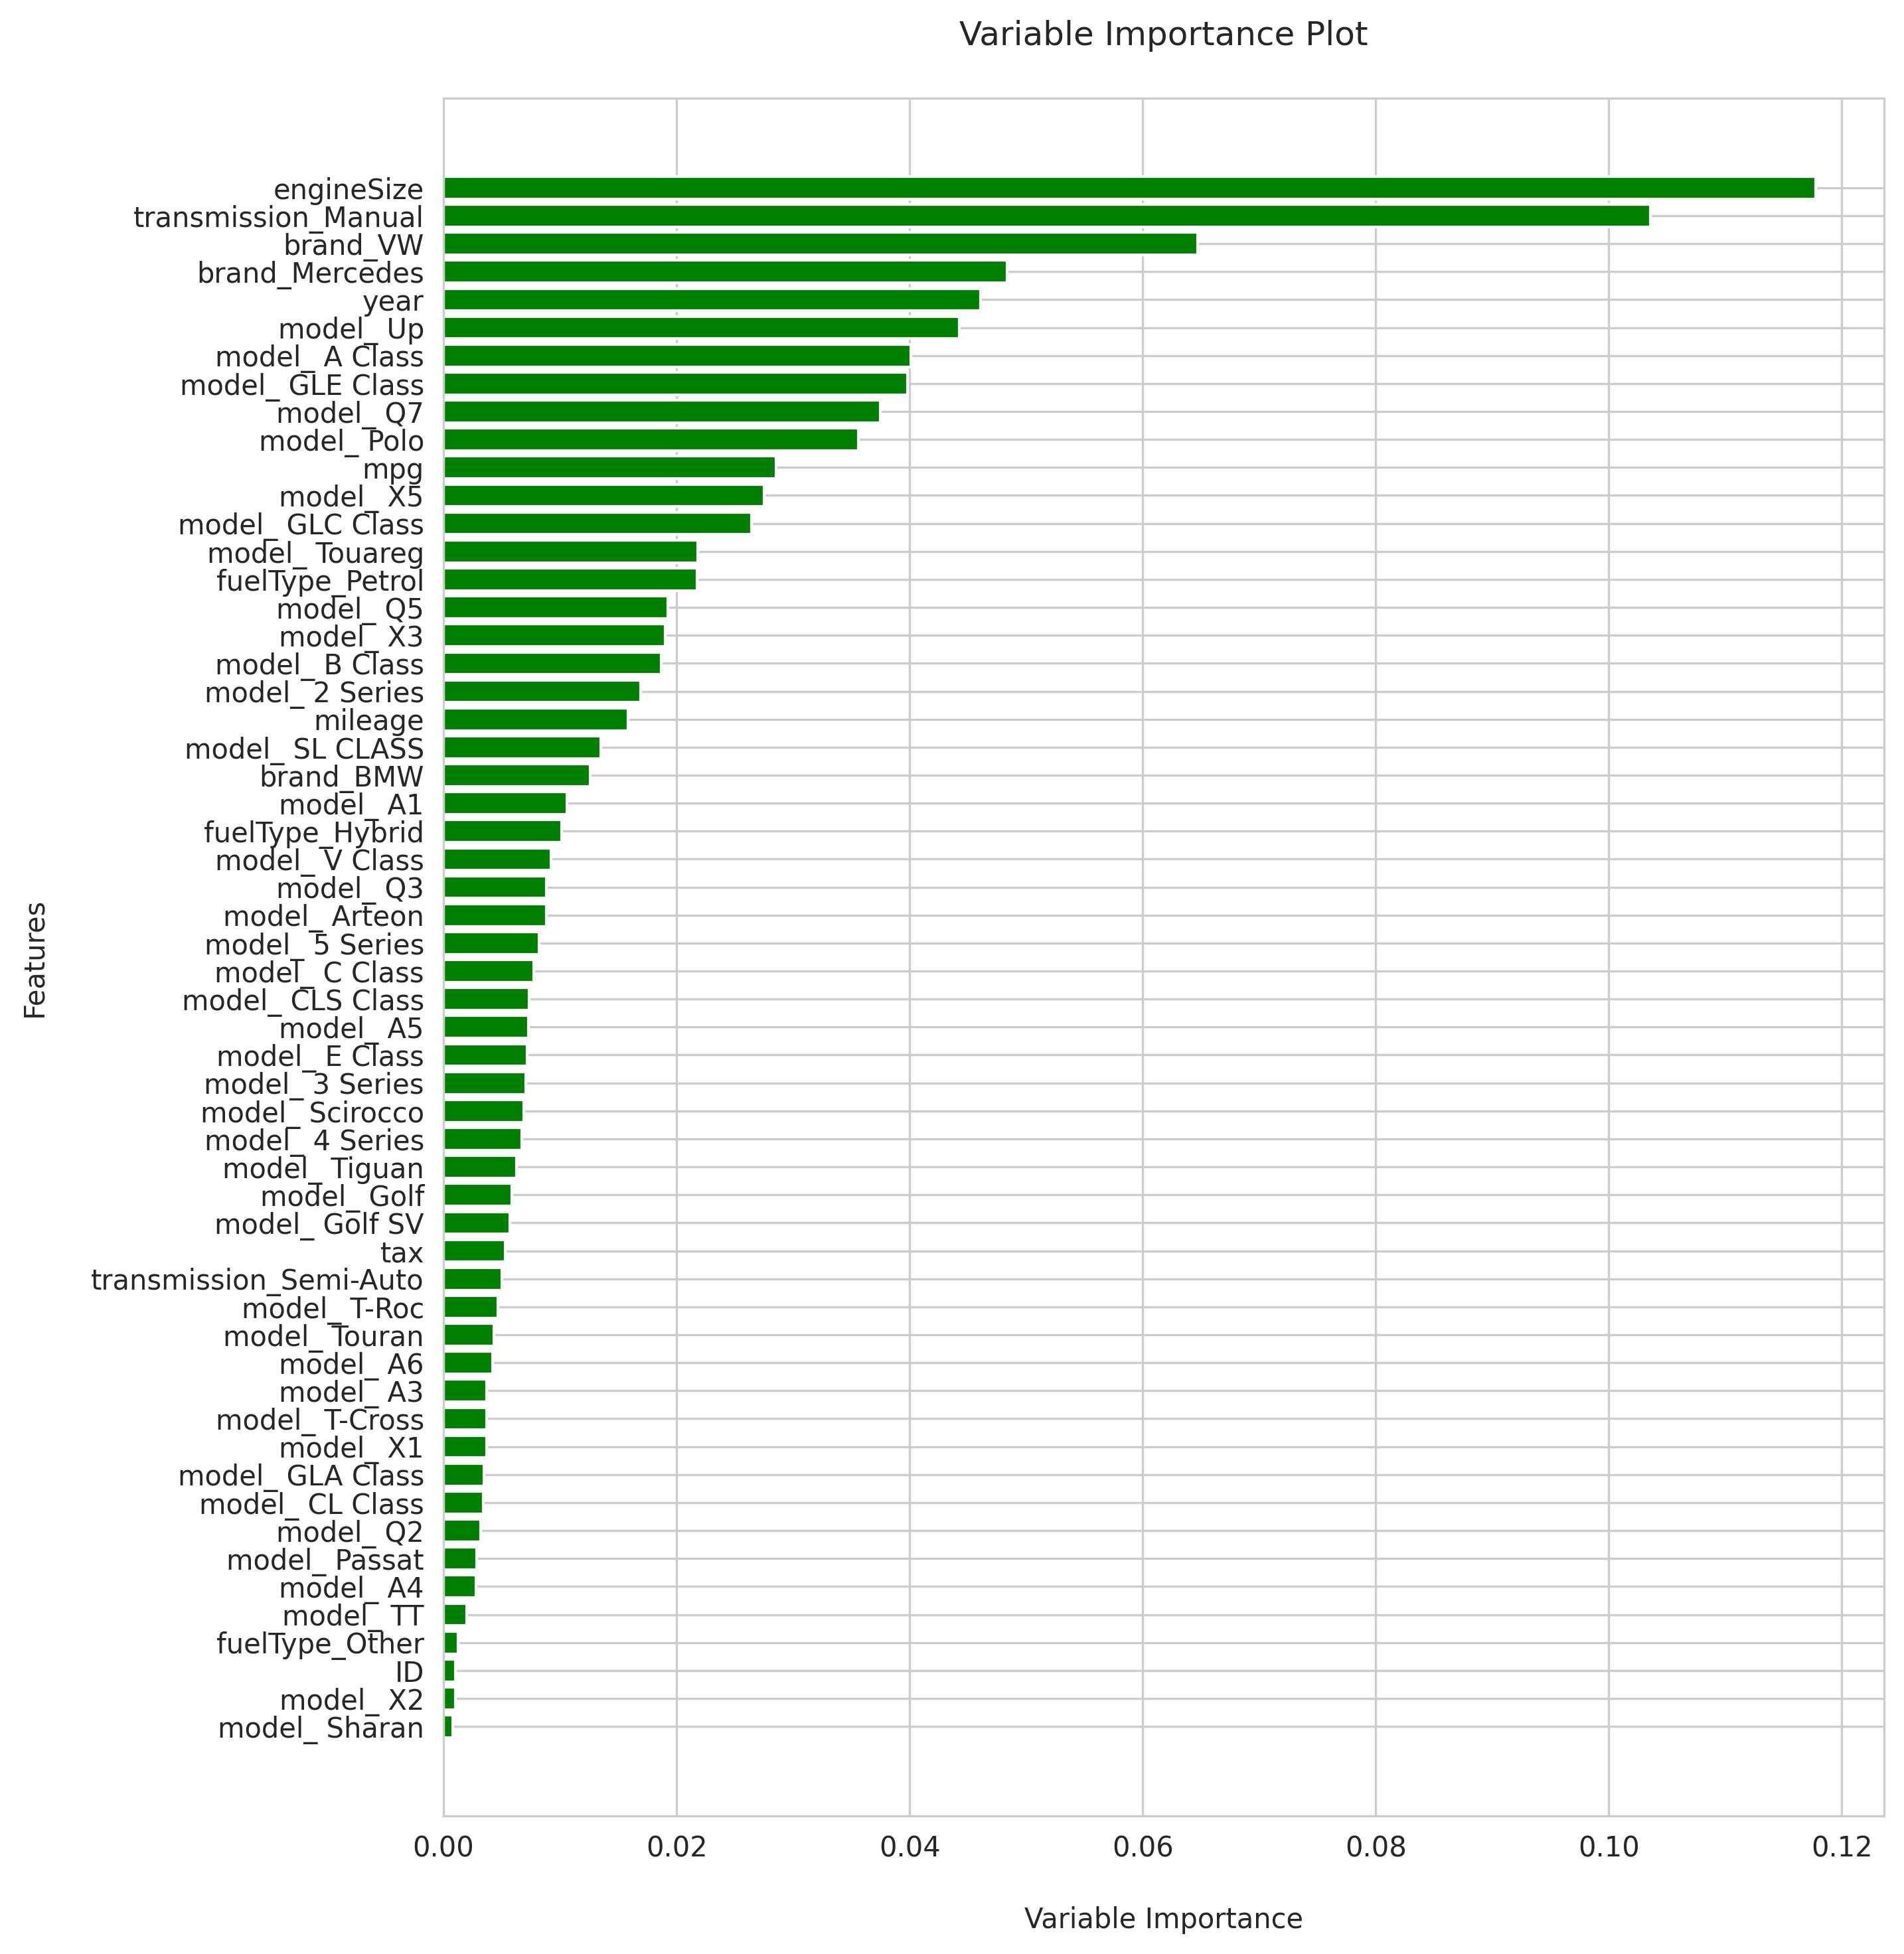

In [201]:
plot_variable_importance(model4_2_3_XGBoost_fitted.best_estimator_, X_train)

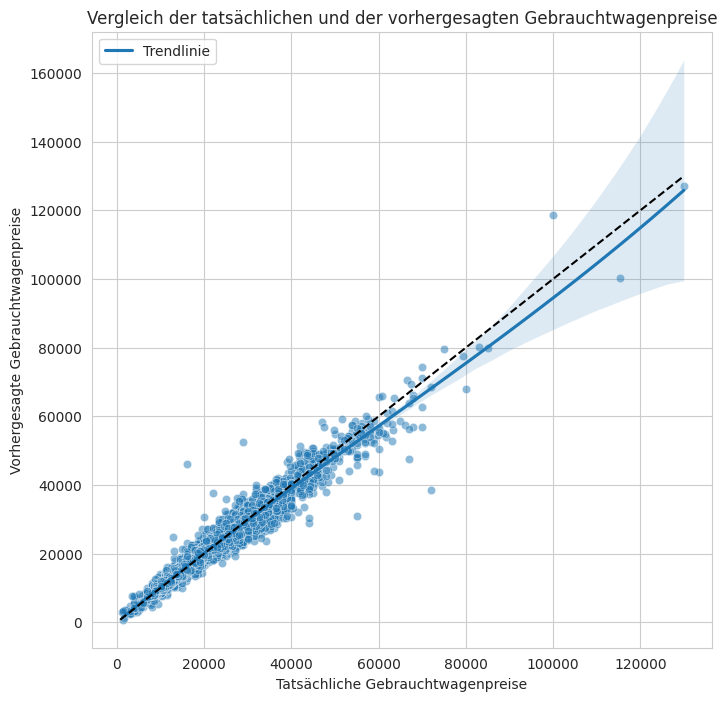

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_model4_2_3, alpha=0.5)

# Nicht-lineare Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=y_pred_model4_2_3, order=3, label="Trendlinie")

# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), y_pred_model4_2_3.min()), max(y_test.max(), y_pred_model4_2_3.max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

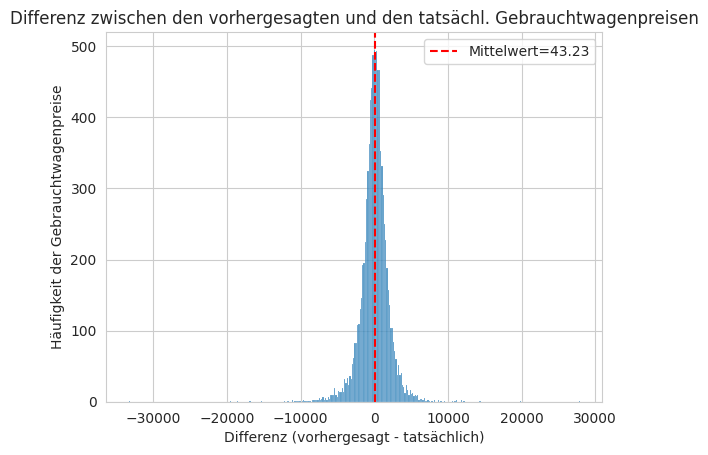

In [203]:
# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = y_pred_model4_2_3 - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Model 5: Random Forest CV und XGBoost CV kombinieren

RMSE Wert ermitteln auf Basis von den gewichteten Prognosewerten der Modell 3.2.2 (Random Forest mit CV und Hyperparameteroptimierung) und 4.2.3 (XGBoost mit CV und Hyperparameteroptimierung)

In [384]:
model5_RMSE = mean_squared_error(y_test, (0.35*y_pred_model3_2_2+0.65*y_pred_model4_2_3), squared=False) 

print("RMSE:", model5_RMSE)

RMSE: 1927.2104152899688


In [ ]:
model3_2_2_rf_CV_fitted = model3_2_2_rf_CV.fit(X_train, y_train)

model4_2_3_XGBoost_fitted = model4_2_3_XGBoost.fit(X_train,y_train)

model5_RMSE = mean_squared_error(y_test, y_pred_model4_2_4, squared=False) 

print("RMSE:", model5_RMSE)

In [ ]:
# Auf Gesamtdatensatz fitten für bessere Prognosen bei Kaggle

model3_2_2_rf_CV_fitted = model3_2_2_rf_CV.fit(X, y)

model4_2_3_XGBoost_fitted = model4_2_3_XGBoost.fit(X,y)

model5_RMSE = mean_squared_error(y_test, 0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3, squared=False) 

print("RMSE:", model5_RMSE)

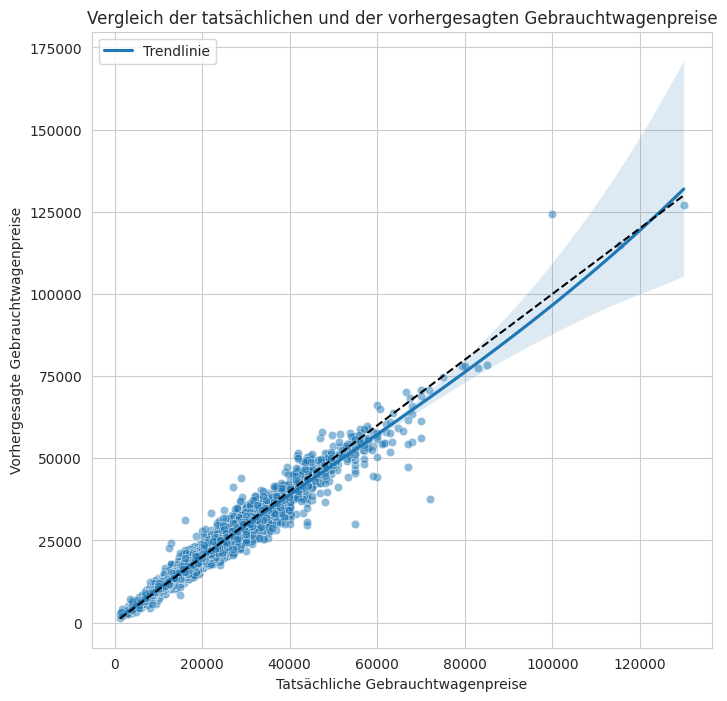

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung eines scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=(0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3), alpha=0.5)

# Nicht-lineare Trendlinie hinzufügen
sns.regplot(scatter=False, x=y_test, y=(0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3), order=3, label="Trendlinie")

# Winkelhalbierende einfügen. 
# Ziel: Abweichungen der vorhergesagten zu den tatsächlichen Werte greifbarer machen
lims = [min(y_test.min(), (0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3).min()), max(y_test.max(), (0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3).max())]
plt.plot(lims, lims, 'k--')

# Achsen beschriften + Titel einfügen
plt.xlabel('Tatsächliche Gebrauchtwagenpreise')
plt.ylabel('Vorhergesagte Gebrauchtwagenpreise')
plt.title('Vergleich der tatsächlichen und der vorhergesagten Gebrauchtwagenpreise')
plt.legend(loc="upper left")

# Graph ausgeben
plt.show()

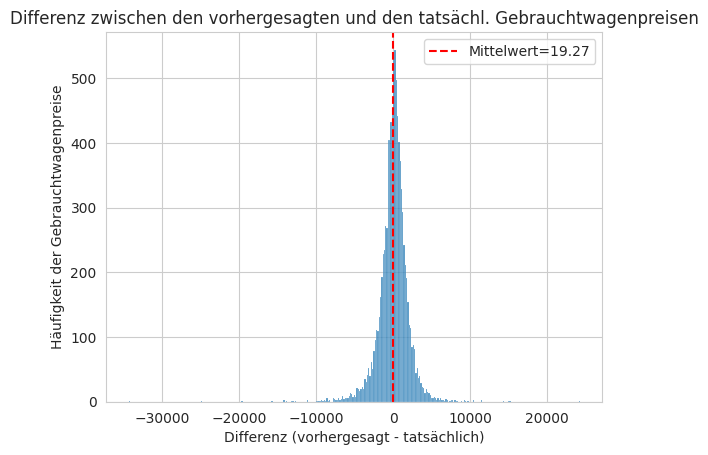

In [506]:
# Differenz zwischen der vorhergesagten und den realen Werten berechnen
diff = (0.5*y_pred_model3_2_2+0.5*y_pred_model4_2_3) - y_test

# Histogramm erstellen
sns.histplot(data=diff)

# Mittelwert berechnen
mean_diff = np.mean(diff)

# Linie für den Mittelwert hinzufügen
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mittelwert={mean_diff:.2f}')

# Diagramm-Layout festlegen
sns.set_style("whitegrid")
plt.title("Differenz zwischen den vorhergesagten und den tatsächl. Gebrauchtwagenpreisen")
plt.xlabel("Differenz (vorhergesagt - tatsächlich)")
plt.ylabel("Häufigkeit der Gebrauchtwagenpreise")
plt.legend()

# Diagramm anzeigen
plt.show()

# Zusammenfassung und Visualisierung der Ergebnisse



In [526]:
model1_RMSE # lineare Regression
model2_RMSE # Decision Tree
model3_RMSE # Random Forest
model3_2_2_RMSE # Bestes Random Forest Modell mit Hyperparameteroptimierung und CV
model4_RMSE # XGBoost Regressionsmodell
model4_2_3_RMSE # Bestes XGBoost Regressionsmodell mit Hyperparameteroptimierung und CV
model5_RMSE # Ensemble Random Forest CV und XGBoost CV

final_results = pd.DataFrame({"Modelle":["M1 Lineare Regression","M2 Decision Tree", "M3.1 Random Forest", "M3.2 Random Forest CV & HPO", "M4.1 XGBoost", "M4.2 XGBoost CV & HPO", "M5 Ensemble (Random Forest + XGBoost (CV & HPO))"],"RMSE":[model1_RMSE, model2_RMSE, model3_RMSE, model3_2_2_RMSE, model4_RMSE, 1963.3337518001745, model5_RMSE]})



<ipython-input-527-f6cb65d89fe5>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




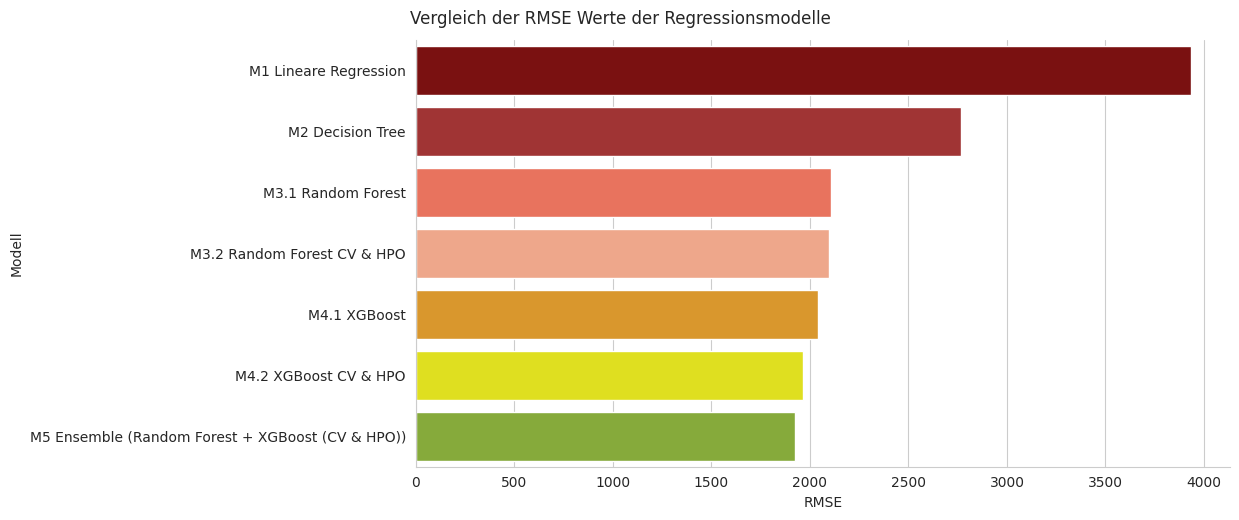

In [527]:
import numpy as np

# Farben für die Bars festlegen
colors = ["#8B0000", "#B22222", "#FF6347", "#FFA07A", "#f59e11", "#FFFF00", "#8dbd28"]

g= sns.catplot(kind="bar", data=final_results, x="RMSE", y="Modelle",
                palette=colors, ci=None, estimator=np.median, height=5, aspect=2.5)

g.set_xlabels("RMSE")
g.set_ylabels("Modell")
g.fig.suptitle("Vergleich der RMSE Werte der Regressionsmodelle",y=1.03)
plt.show()

# Quelle: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

In [453]:
print(sns.color_palette("Set3"))

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118), (0.5019607843137255, 0.6941176470588235, 0.8274509803921568), (0.9921568627450981, 0.7058823529411765, 0.3843137254901961), (0.7019607843137254, 0.8705882352941177, 0.4117647058823529), (0.9882352941176471, 0.803921568627451, 0.8980392156862745), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627), (0.7372549019607844, 0.5019607843137255, 0.7411764705882353), (0.8, 0.9215686274509803, 0.7725490196078432), (1.0, 0.9294117647058824, 0.43529411764705883)]


# Save Results for Submission

Make predictions on the competition data with your trained model

In [385]:
comp_data = pd.get_dummies(comp_data, drop_first=False)

In [387]:
comp_predictions= random_cv.predict(comp_data)

# Für Modell 5
# comp_predictions1= model3_2_2_rf_CV_fitted.predict(comp_data) 
# comp_predictions2= model4_2_3_XGBoost_fitted.predict(comp_data)

# comp_predictions = 0.35*comp_predictions1 + 0.65*comp_predictions2





In [388]:
comp_predictions 

array([17235.78024062, 21381.221025  , 13946.35426562, ...,
       11738.98460312, 21086.22237812,  9062.32129062])

In [389]:
model_name = "DZTestcombined_v4.csv"

In [390]:
def save_submission_for_kaggle(model_name, comp_predictions, comp_data):
  import pandas as pd
  submission_data = pd.DataFrame({"ID": comp_data["ID"], "Actual": comp_predictions})
  submission_data.to_csv(model_name, index=False)

## Save submission file

In [391]:
save_submission_for_kaggle(model_name, comp_predictions, comp_data)

## FOR GOOGLE COLAB USERS ONLY: Download the created file

In [392]:
try:
  from google.colab import files
  files.download(model_name)
except ModuleNotFoundError:
  print("Not using Google Colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FOR ANACONDA USERS ONLY: Find the created file in your folder structure

The file is located in the same directory as your notebook.

In [ ]:
# run this cell if you don't know the location
import os
print(os.getcwd())

# How to get Going

- Try out other algorithms!
- Try out Cross Validation and Hyperparameter Tuning (see coding hint below)
- Try to understand why different models perform better or worse. Make Visualizations (Actual vs. Predicted Plots, Feature Importances, etc.)
- Try to make ensemble different predictions (average of multiple models)

# Implementation Help for Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error, make_scorer 

# fit model
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
parameters = _____ # hyperparameters to be optimized
model_CV = GridSearchCV(_____, parameters, scoring=RMSE, cv=5) # Apply 5 Cross Validiation Folds to find best hyperparameters